In [1]:
# In this notebook we will build and optimize 
# a neural network classifier using Keras

# We will work with the PCVD dataset
# go to this website and click on Download
# https://www.kaggle.com/sabermalek/pcvcspeech

# Then put the files in the same directory as this .ipynb file

In [2]:
# This cell loads and processes the data
# you do not have to do anything here

# The libraries needed
import os
import scipy.io
from scipy.signal.windows import hann
import numpy as np
import librosa

# list all the files that are part of the dataset
all_mats = [i for i in os.listdir('.') if 'mat' in i]

# load the time-series data in each of the data files
# and store them in a numpy array
data = []
for mat in all_mats:
  d = scipy.io.loadmat(mat)['x']
  data.append(d)
data = np.concatenate(data,axis=1)

# reshape the data so that we have a matrix where each
# row is a datapoint (i.e. a vowel-consonant utterance)
_,nreps,nvow,nsamps=data.shape
data = np.reshape(data,(nreps*nvow,nsamps),order='F')

# window the data to reduce the number of samples
# and center the window around the vowel
data = data[:,5000:15000]*hann(10000)

# finally, resample the data have a sampling
# rate of 16000
sr = 16000
X = []
for d in data:
  X.append(librosa.resample(d,48000,sr))
data = np.array(X)

print("The shape of the data is", data.shape)

The shape of the data is (1794, 3334)


In [3]:
# "data" has the same number of datapoints for each vowel
# In farsi, there are 6 vowels. Considering the number of
# datapoints in "data". How many points do you have per vowel?

ndatapoints_per_vowel = # your code here

# now, the first ndatapoints_per_vowel rows in "data" contain
# datapoints tha correspond to the vowel "a". The next
# ndatapoints_per_vowel rows correspond to the vowel "i", etc.

# we need to create a "labels" matrix with the same number of rows
# as "data", and six columns. In "labels", each row has a 1 and
# the rest entries are zeros. The location of the number 1
# indicates which vowel the corresponding row of "data" has 
# time-series data for


labels = # your code here


print("the shape of labels is",labels.shape)

the shape of labels is (1794, 6)


In [4]:
# now randomly select ~5% of rows in "data" to be the test set
# Hint: you can use the np.random.choice function (with replace=False) 
# and use the first ~5% of its output to index out the test set
# the remaining datapoints will be the "development" set

all_idx = # your code here

data_ts = # your code here
labels_ts = # your code here
data_dv = # your code here
labels_dv = # your code here

print("The shape of the development data is ", data_dv.shape)
print("The shape of the development labels is ", labels_dv.shape)
print("The shape of the testing data is ", data_ts.shape)
print("The shape of the testing labels is ", labels_ts.shape)

The shape of the development data is  (1704, 3334)
The shape of the development labels is  (1704, 6)
The shape of the testing data is  (90, 3334)
The shape of the testing labels is  (90, 6)


In [5]:
# now we randomly select ~15% of the development
# data to be your validation set, and the rest to be your training
# set. In this homework we will NOT do k-fold cross-validation.

all_idx = # your code here

Xvl = # your code here
Yvl = # your code here
Xtr = # your code here
Ytr = # your code here

print("The shape of the taining data is ", Xtr.shape)
print("The shape of the training labels is ", Ytr.shape)
print("The shape of the validation data is ", Xvl.shape)
print("The shape of the validation labels is ", Yvl.shape)

The shape of the taining data is  (1449, 3334)
The shape of the training labels is  (1449, 6)
The shape of the validation data is  (255, 3334)
The shape of the validation labels is  (255, 6)


In [6]:
# now we have to standardize the data.

# Here each datapoint is a time-series. Additionally, we have
# a very limited number of datapoints. As a result, we must
# standardize each datapoint separately. Fortunately, audio time-series
# can be normalized to have zero mean and values that in the
# range between -1 and 1.

# normalize the training and validation data so that each datapoint
# has a mean centered around zero, and the largest magnitude in a datapoint is 1

mu_tr = # your code here
max_tr = # your code here
mu_vl = # your code here
max_vl = # your code here

Xtr = # your code here
Xvl = # your code here

In [7]:
# we have a very limited number of training data. 
# as a result, we must "augment" the number of training datapoints
# here we suggest that you augment the data by adding noise to it
# and randomly shift its pitch. However, you should consider augmenting
# your data with even more techniques. 

# create a copy of your training data to add gaussian noise 
# with a small variance
Xnoise = Xtr + # your code here

# create a copy of your training data to randomly shift 
# the pitch of each datapoint by a few semitones
pitch_factors = # your code here
Xpitch = []
for i, x in enumerate(Xtr):
  Xpitch.append(librosa.effects.pitch_shift(# your code here

# now concatenate your original data with the augmented datapoints
Xtr = np.concatenate(# your code here
Ytr = np.concatenate(# your code here

print("The shape of the training data is ", Xtr.shape)
print("The shape of the training labels is ", Ytr.shape)
print("The shape of the validation data is ", Xvl.shape)
print("The shape of the validation labels is ", Yvl.shape)

The shape of the training data is  (4347, 3334)
The shape of the training labels is  (4347, 6)
The shape of the validation data is  (255, 3334)
The shape of the validation labels is  (255, 6)


In [8]:
# Now we will import tensorflow and we will use this library
# to build our model using the Keras API, and automatic differentiation

import tensorflow as tf

# you may also use a GPU if you have one available
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [9]:
# First, you will replicate your results on this dataset using a softmax
# classifier

# let's get some useful variables

# the number of training datapoints
ntrain = # your code here

# the number of audio samples per datapoint (number of features in each datapoint)
nsamps = # your code here

# the number of categories we are trying to learn to classify
nClasses = # your code here

# the regularization strength
reg = # your code here

# the learning rate
lr = # your code here

# the number of epochs that we want to train for
nepochs = # your code here

# Now we will define the keras model graph
# Hint1: remember that the loss (defined during model compilation)
# carries out the final softmax function. Here we only want to
# calculate the logits (i.e. what we called "theta" in class)
# Hint2: do not forget to add regularization.
inputs = tf.keras.Input(# your code here
theta = tf.keras.layers.Dense(# your code here

# actually build the model by defining its inputs and outputs
model = tf.keras.Model(# your code here

# compile the model
# you will have to define: 
#   the loss (use CategoricalCrossentropy with from_logits=Ture),
#   the optimizer (use SGD)
#   the metrics (use "accuracy")
model.compile(
    loss=# your code here
    optimizer=# your code here
    metrics=# your code here
)

# Finally, visualize the model
model.summary()

# Q: How many parameters does your model have in total?
# A:
# W: Why does it have this number of parameters? break down the arithmethic logic that results in this number of parameters
# A:

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3334)]            0         
                                                                 
 dense (Dense)               (None, 6)                 20010     
                                                                 
Total params: 20,010
Trainable params: 20,010
Non-trainable params: 0
_________________________________________________________________


In [10]:
# now that the model has been built, let's see how it performs on the training
# data before being trained. Make the batch_size the total number of training datapoints

_ = model.evaluate(# your code here

# Q: what do you expect the initial loss and training accuracy to be?
# A:
# Q: does the evaluation before training agree with your expectation?

1/1 [==============================] - 2s 2s/step - loss: 122.1318 - accuracy: 0.1686


In [ ]:
# now we can move on to train the model

# using the "fit" method, pass your training data, training labels, 
# validation data, validation labels, and number of epochs to carry out the training routine.
# save the output in a variable for "training logs". Also, make the batch_size 
# equal to the total number of training datapoints so that the gradients are 
# computed using all the data at once, just like you did in your previous homework


tr_logs = model.fit(# your code here

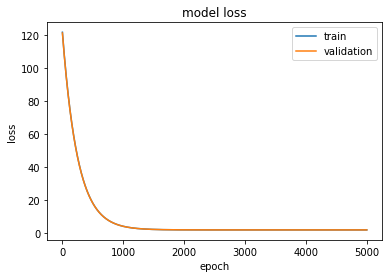

In [ ]:
# now that trianing is done, let's visualize the training and validation loss
# all of that information is readily available in the "training logs"

import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(tr_logs.history['loss'])
plt.plot(tr_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

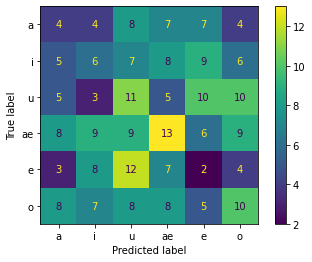

In [13]:
# PERFORMANCE: validation set

# now that training is over, let's see our model's confusion matrix with the validation set
import sklearn

# calculate theta using the best parameters found
# hint: use your model's "predict" method
theta = model.predict(# your code here

# compute the confusion matrix and plot it
conf_mat = sklearn.metrics.confusion_matrix(np.argmax(Yvl,axis=1),np.argmax(theta,axis=1))  
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=["a","i","u","ae","e","o"])
disp.plot()
plt.show()

In [14]:
# now let's "hear" the model weights

# to extract your model's weights, you will have to use your model's "layers" attribute,
# and index it to access the layer with the weights (look back at model.summary to review
# your model's architecture). Once you have indexed the layer where "W" lives,
# you can use the "get_weights" method to actually get "W" and b
W, b = model.layers[1].get_weights()


# now you can listen
from IPython.display import Audio
Audio(data=W[:,0], rate=sr)

In [ ]:
# Now let's see how the model does with the evaluation data

# Do not forget to standardize your data. 
mu_ts = # your code here
max_ts = # your code here
Xts = # your code here

# evaluate the model
model.evaluate(# your code here

# compute the confusion matrix and plot it
theta = # your code here
conf_mat = sklearn.metrics.confusion_matrix(np.argmax(labels_ts,axis=1),np.argmax(theta,axis=1))  
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=["a","i","u","ae","e","o"])
disp.plot()
plt.show()

# If you did everything correctly in this and the previous homework,
# the model performance in the evaluation set should be very similar in both
# homeworks.

# We are done replicating last week's homework using Keras. Now we will move
# on to building something new

In [16]:
# This week's homework consists in building and optimizing a neural network
# classifier. The steps are similar to what we just did, but we will have
# to address some important differences 

# let's remember the useful variables

# the number of training datapoints
ntrain = # your code here

# the number of audio samples per datapoint (number of features in each datapoint)
nsamps = # your code here

# the number of categories we are trying to learn to classify
nClasses = # your code here

# the regularization strength (you will have to tune this again, since the model is different)
reg = # your code here

# the learning rate (you will also have to tune this again, since the model is different)
lr = # your code here

# the number of epochs that we want to train for (tune this too)
nepochs = # your code here

# the size of the hidden layer(s)
nhidden1 = # your code here
# nhidden2 =
# nhidden3 =
# .
# .
# .

# Now we will define the keras model graph
# Hint1: remember that the loss (defined during model compilation)
# carries out the final softmax function. Here we only want to
# calculate the logits (i.e. what we called "theta" in class)
# Hint2: do not forget to add regularization.
# Hint3: do not forget to add a non-linearity to the hidden layer
inputs = tf.keras.Input(# your code here
h1 = tf.keras.layers.Dense(# your code here                        
theta = tf.keras.layers.Dense(# your code here

# actually build the model by defining its inputs and outputs
nn_model = tf.keras.Model(# your code here

# compile the model
# you will have to define: 
#   the loss (use CategoricalCrossentropy with from_logits=Ture),
#   the optimizer (use SGD)
#   the metrics (use "accuracy")
nn_model.compile(
    loss=# your code here
    optimizer=# your code here
    metrics=# your code here
)
# Q: why do we say "from_logits=True" in the CategoricalCrossentropy loss?
# A: 

# Finally, visualize the model
nn_model.summary()

# Q: How many parameters does your model have in total?
# A:
# W: Why does it have this number of parameters? break down the arithmethic logic that results in this number of parameters
# A:

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 3334)]            0         
                                                                 
 dense_1 (Dense)             (None, 32)                106720    
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 106,918
Trainable params: 106,918
Non-trainable params: 0
_________________________________________________________________


In [17]:
# now that the neural network model has been built, let's see how it performs on the training
# data before being trained. Make the batch_size the total number of training datapoints

_ = nn_model.evaluate(Xtr,Ytr,batch_size=ntrain)

# Q: what do you expect the initial loss and training accuracy to be?
# A:
# Q: does the evaluation before training agree with your expectation?
# A:

1/1 [==============================] - 0s 340ms/step - loss: 742.8864 - accuracy: 0.1629


In [ ]:
# now we can move on to train the neural network model

# to save our best model, we will make use of model checkpoints.
# a model checkpoint saves the model as a file, and we can ensure that
# we save the model that best performs on the validation (or training) data.

# to use model checkpoints, we need to define a "callback". A callback is a method
# that will monitor model performance during training to save the checkpoint

nn_model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = 'nn_model_chk/checkpoint',    # the location where we will save the checkpoint file 
    save_weights_only = True,                
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

# using the "fit" method, pass your training data, training labels, 
# validation data, validation labels, and number of epochs to carry out the training routine.
# save the output in a variable for "training logs". This time, you should also pass
# a "callbacks" argument to save your model checkpoint. Also, make the batch_size 
# equal to the total number of training datapoints so that the gradients are 
# computed using all the data at once, just like you did in your previous homework


tr_logs = nn_model.fit(# your code here

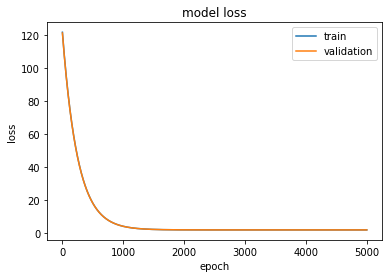

In [ ]:
# now that trianing is done, let's visualize the training and validation loss
# all of that information is readily available in the "training logs"

import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(tr_logs.history['loss'])
plt.plot(tr_logs.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
# PERFORMANCE: validation set

# now that training is over, let's see our model's confusion matrix with the validation set
import sklearn

# calculate theta using the best parameters found
# hint: use your model's "predict" method
theta = nn_model.predict(# your code here

# compute the confusion matrix and plot it
conf_mat = sklearn.metrics.confusion_matrix(np.argmax(Yvl,axis=1),np.argmax(theta,axis=1))  
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=["a","i","u","ae","e","o"])
disp.plot()
plt.show()

# If you did everything correctly, you should be able to easily train a model
# that surpases the accuracies we saw using only softmax. How high can you bring
# the model accuracy on the validation set?



In [ ]:
################################################################################
################################################################################
# WARNING: DO THIS ONLY AFTER YOU ARE DONE OPTIMIZING YOUR NEURAL NETWORK MODEL
################################################################################
################################################################################

# Now let's see how the model does with the evaluation data

# Do not forget to standardize your data (if you haven't). 
mu_ts = # your code here
max_ts = # your code here
Xts = # your code here

# evaluate the model
nn_model.evaluate(# your code here

# compute the confusion matrix and plot it
theta = # your code here
conf_mat = sklearn.metrics.confusion_matrix(np.argmax(labels_ts,axis=1),np.argmax(theta,axis=1))  
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=["a","i","u","ae","e","o"])
disp.plot()
plt.show()

# When you are done, submit a picture of your final evaluation as a post to our subreddit
# https://www.reddit.com/r/deeplearningaudio/

# post the accuracy and the confusion matrix on the evaluation set

In [ ]:
# SIDENOTE: since you saved model checkpoints, your best neural network model can easily be
# re-built using this line of code (assuming that your model architecture has been defined)
nn_model.load_weights('nn_model_chk/checkpoint')

# so if you have a model that you like, you can use it in the future without 
# needing to train it again from scratch. 